# NSMC 불러와서 정제하기
- 감정분석을 위해, Naver Movie Corpus(https://github.com/e9t/nsmc) 사용.

In [1]:
def read_documents(filename):
    # NSMC 불러오는 함수.
    with open(filename, encoding="utf-8") as f:
        documents = [line.split('\t') for line in f.read().splitlines()]
        documents = documents[1:]
        
    return documents

train_docs = read_documents("data/NaverMovie/ratings_train.txt")
test_docs = read_documents("data/NaverMovie/ratings_test.txt")

In [2]:
print(len(train_docs))
print(len(test_docs))

150000
50000


### 함수 정의

In [3]:
def text_cleaning(doc):
    # 한국어를 제외한 글자를 제거하는 함수
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힇 ]", "", doc)
    return doc

def define_stopwords(path):
    
    SW = set()

    with open(path) as f:
        for word in f:
            SW.add(word)
            
    return SW

def text_tokenizing(doc):    
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]

### 불러온 데이터를 품사 태그를 붙여서 토크나이징

In [7]:
from konlpy.tag import Mecab
from konlpy.tag import Okt
import json
import os
import re
from pprint import pprint

# 형태소 분석기 불러오기
okt = Okt()
mecab = Mecab()

SW = define_stopwords("data/stopwords-ko.txt")

# 텍스트가 20만개이기 때문에, 정제하는데 시간이 걸린다.
# 한 번 만들고 나서는 코드를 다시 실행시켰을 때, 정제할 필요 없이 불러오게끔 코드 짜기

if os.path.exists("train_docs.json"): # 해당 경로에 파일이 존재하면 True, 없으면 False 반환.
    # 불러오기
    with open("train_docs.json", 'w', encoding='utf-8') as f:
        train_data = json.load(f)
    
else :
    train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])]
    
    with open("train_docs.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t') 
        # 변수, 저장할 변수, 아스키값을 보존할 것이냐(utf-8로 인코딩 하여 False), 무엇을 구분으로 저장할 것인지
        
if os.path.exists("test_docs.json"): # 해당 경로에 파일이 존재하면 True, 없으면 False 반환.
    # 불러오기
    with open("test_docs.json", 'w', encoding='utf-8') as f:
        train_data = json.load(f)
    
else :
    test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
    
    with open("test_docs.json", 'w', encoding='utf-8') as f:
        json.dump(test_data, f, ensure_ascii=False, indent='\t') 
        
pprint(train_data[0])
pprint(test_data[0])

(['진짜', '짜증', '네요', '목소리'], '0')
(['GDNTOPCLASSINTHECLUB'], '0')


# NLTK를 이용한 histogram 분석

In [8]:
import nltk

total_tokens = [token for doc in train_data for token in doc[0]]
print(len(total_tokens))

1206399


In [9]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

51787
[('영화', 57621),
 ('..', 22813),
 ('는데', 11507),
 ('너무', 11002),
 ('정말', 9783),
 ('으로', 9322),
 ('네요', 9052),
 ('재밌', 9023),
 ('지만', 8403),
 ('진짜', 8327)]


### Histogram 그리기

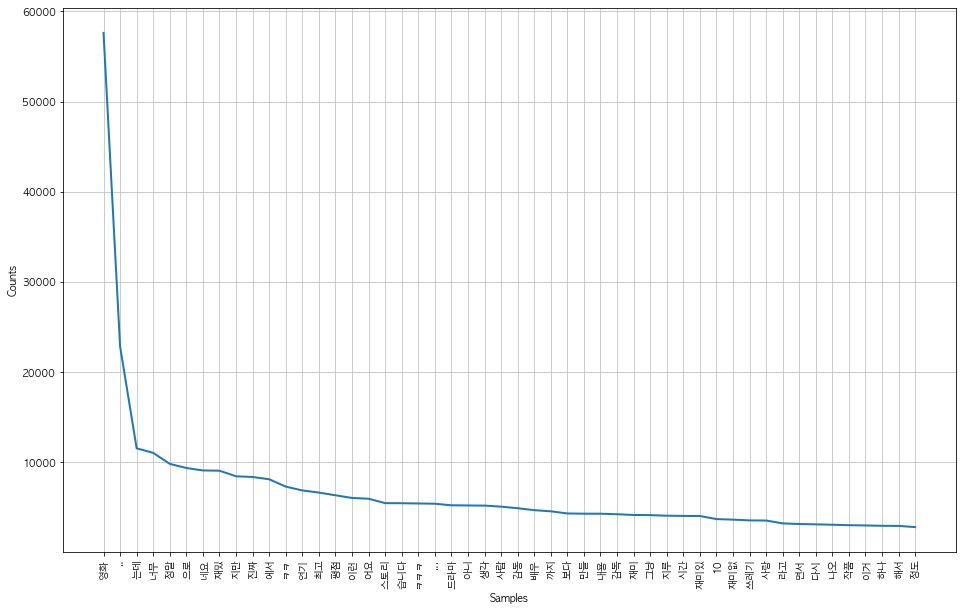

In [10]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == "Darwin":
    rc('font', family="AppleGothic")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
plt.figure(figsize=(16, 10))
text.plot(50)

### Wordcloud 그리기

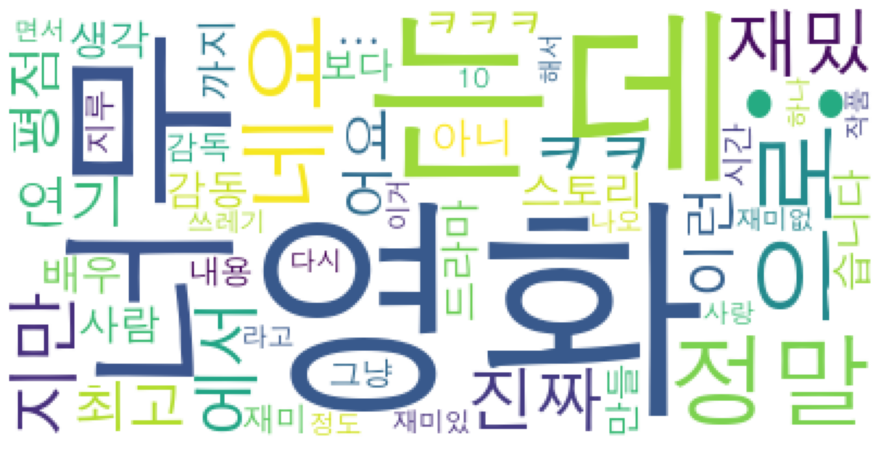

In [12]:
from wordcloud import WordCloud

data = text.vocab().most_common(50)
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                     relative_scaling=0.2, # 단어 중요도에 따른 크기 조정
                     background_color='white',
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()